# 밑바닥부터 시작하는 딥러닝 (Deep Learning from Scratch)

<a href="https://github.com/ohing504/deep-learning-from-scratch" style="color: Black;">
  <span class="fa fa-github fa-1x"></span> GitHub
</a>&nbsp;&nbsp;
<a href="SUMMARY.ipynb" style="color: Black;">
  <span class="fa fa-list-ul fa-1x"></span> Contents
</a>

# 2 퍼셉트론

* **퍼셉트론(perceptron)**: 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 고안한 알고리즘
* 신경망 (딥러닝)의 기원이 되는 알고리즘

## 2.1 퍼셉트론이란?

* 다수의 신호를 입력으로 받아 하나의 신호를 출력
* *신호*: 전류나 강물처럼 **흐름**이 있는 것
  * '흐른다/안 흐른다(1 이나 0)'의 두 가지 값을 가짐.

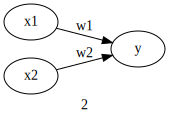

In [1]:
# info. https://graphviz.readthedocs.io/en/stable/examples.html
from graphviz import Digraph

dot = Digraph()
dot.graph_attr['rankdir'] = 'LR'

dot.node('y')
for i in (1, 2):
    dot.node('x%d' % i)
    dot.edge('x%d' % i, 'y', 'w%d' % i, constraint='true')

dot.attr(label='입력이 2개인 퍼셉트론')
dot

* 입력으로 2개의 신호를 받는 퍼셉트론의 예
  * 입력 신호: $x_1$, $x_2$
  * 출력 신호: $y$
  * 가중치(weight): $w_1$, $w_2$
  * **뉴런(노드)**: 그림의 원 부분

* 입력 신호가 뉴런에 보내질 때는 각각 고유한 **가중치**가 곱해짐 ($w_1 x_1$, $w_2 x_2$)

* 뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어서면 1을 출력
  * '뉴런이 활성화한다'
  * 이 책에서는 한계를 **임계값**이라 하며, $\theta$ 기호<sup>theta, 세타</sup>로 표시
  
* 수식으로 나타내면:
$$
y =
  \begin{cases}
    0  &  (w_1 x_1 + w_2 x_2 \leq \theta) \\
    1  &  (w_1 x_1 + w_2 x_2 > \theta)
  \end{cases}
\tag{식 2.1}
$$

* 퍼셉트론은 복수의 입력 신호 각각에 고유한 가중치 부여
  * **가중치가 클수록 해당 신호가 더 중요**

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트

* AND 게이트
  * 입력이 둘이고 출력은 하나
  * 퍼셉트론으로 표현하기 위한 매개변수 설정: $(w_1, w_2, \theta)$ = (0.5, 0.5, 0.7) or (0.5, 0.5, 0.8) or (1.0, 1.0, 1.0)

| $x_1$ | $x_2$ | $y$ |
|:-----:|:-----:|:---:|
|   0   |   0   |  0  |
|   1   |   0   |  0  |
|   0   |   1   |  0  |
|   1   |   1   |  1  |

*AND 게이트의 **진리표**: 두 입력이 모두 1일 때만 1을 출력, 그 외에는 0을 출력*

### 2.2.2 NAND 게이트와 OR 게이트

* NAND 게이트
  * Not AND, AND 게이트의 출력을 뒤집은 것
  * 매개변수: $(w_1, w_2, \theta)$ = (-0.5, -0.5, -0.7) 등
  
| $x_1$ | $x_2$ | $y$ |
|:-----:|:-----:|:---:|
|   0   |   0   |  1  |
|   1   |   0   |  1  |
|   0   |   1   |  1  |
|   1   |   1   |  0  |

*NAND 게이트의 **진리표**: 두 입력이 모두 1일 때만 0을 출력, 그 외에는 1을 출력*
  
* OR 게이트

| $x_1$ | $x_2$ | $y$ |
|:-----:|:-----:|:---:|
|   0   |   0   |  0  |
|   1   |   0   |  1  |
|   0   |   1   |  1  |
|   1   |   1   |  1  |

*OR 게이트의 **진리표**: 입력 신호 중 하나 이상이 1이면 1을 출력, 그 외에는 0을 출력*

<div class='alert alert-success'>
<li>여기서 퍼셉트론의 매개변수 값을 정하는 것은 컴퓨터가 아니라 인간 (진리표를 보며 매개변수 값 생각)</li>
<li>기계학습 문제는 이 매개변수의 값을 컴퓨터가 자동으로 정하게 하는 것</li>
<li><b>학습</b>이란 적절한 매개변수 값을 정하는 작업</li>
<li>사람은 퍼셉트론의 구조(모델)를 고민하고 컴퓨터에 학습할 데이터를 주는 역할</li>
</div>

* **퍼셉트론의 구조**는 AND, NAND, OR 게이트에서 모두 동일
  * 매개변수 (가중치와 임계값)에 따라 여러 게이트를 표현 가능

## 2.3 퍼셉트론 구현하기

* x1과 x2를 인수로 받는 AND 함수

In [2]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [3]:
AND(0, 0)  # 0 출력

0

In [4]:
AND(1, 0)  # 0 출력

0

In [5]:
AND(0, 1)  # 0 출력

0

In [6]:
AND(1, 1)  # 1 출력

1

### 2.3.2 가중치와 편향 도입

* (식 2.1)의 $\theta$를 $-b$로 치환
  * $b$: 편향(bias)

$$
y =
  \begin{cases}
    0  &  (b + w_1 x_1 + w_2 x_2 \leq 0) \\
    1  &  (b + w_1 x_1 + w_2 x_2 > 0)
  \end{cases}
\tag{식 2.2}
$$

* (식 2.1)과 (식 2.2)는 같은 의미
  * 퍼셉트론은 입력 신호에 가중치를 곱한 값과 편향을 합하여, 그 값이 0을 넘으면 1을 출력하고 그렇지 않으면 0을 출력

In [7]:
import numpy as np

# AND 게이트
x = np.array([0, 1])  # 입력
w = np.array([0.5, 0.5])  # 가중치
b = -0.7

w * x

array([0. , 0.5])

In [8]:
np.sum(w * x)

0.5

In [9]:
np.sum(w * x) + b  # 대략 -0.2

-0.19999999999999996

* 위의 예는 입력이 (x1: 0, x2: 1)이며 (식 2.2)의 결과값은 -0.2 이므로 최종 출력은 0

### 2.3.3 가중치와 편향 구현하기

* 가중치과 편향을 도입한 AND 게이트

In [10]:
def AND_OLD(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1 * w1 + x2 * w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    tmp = np.sum(x * w) + b
    if tmp <= 0:
        return 0
    else:
        return 1

* $-\theta$가 편향 $b$로 치환
* 매개변수:
  * $w_1$과 $w_2$는 각 입력 신호가 결과에 주는 영향력(중요도)을 조정
  * 편향 $b$는 뉴련이 얼마나 쉽게 활성화 (결과로 1을 출력)하느냐를 조정

In [11]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])  # AND와 가중치(w와 b)만 다르다!
    b = 0.7

    return 0 if np.sum(x * w) + b <= 0 else 1

def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])  # AND와 가중치(w와 b)만 다르다!
    b = -0.2

    return 0 if np.sum(x * w) + b <= 0 else 1

methods = [AND, NAND, OR]

for method in methods:
    for i in range(2):
        for j in range(2):
            print('{}({}, {}): {}'.format(method.__name__, j, i, method(j, i))) 
    print()

AND(0, 0): 0
AND(1, 0): 0
AND(0, 1): 0
AND(1, 1): 1

NAND(0, 0): 1
NAND(1, 0): 1
NAND(0, 1): 1
NAND(1, 1): 0

OR(0, 0): 0
OR(1, 0): 1
OR(0, 1): 1
OR(1, 1): 1



<div class="alert alert-warning">
pytest 관련 내용은 개인 공부를 위해 추가한 내용입니다. 해당 내용에 대한 부분은 따로 다루지 않습니다.
</div>

In [19]:
__file__ = 'Chapter2.ipynb'

import ipytest.magics
import pytest

In [13]:
%%run_pytest[clean] -qq


@pytest.mark.parametrize('input1,input2,expected', [(0, 0, 0), (1, 0, 0),
                                                    (0, 1, 0), (1, 1, 1)])
def test_and(input1, input2, expected):
    assert AND(input1, input2) == expected


@pytest.mark.parametrize('input1,input2,expected', [(0, 0, 1), (1, 0, 1),
                                                    (0, 1, 1), (1, 1, 0)])
def test_nand(input1, input2, expected):
    assert NAND(input1, input2) == expected


@pytest.mark.parametrize('input1,input2,expected', [(0, 0, 0), (1, 0, 1),
                                                    (0, 1, 1), (1, 1, 1)])
def test_or(input1, input2, expected):
    assert OR(input1, input2) == expected

............


## 2.4 퍼셉트론의 한계

### 2.4.1 도전! XOR 게이트

* XOR 게이트: **배타적 논리합**
  * $x_1$과 $x_2$ 중 한쪽이 1일 때만 1을 출력
  
| $x_1$ | $x_2$ | $y$ |
|:-----:|:-----:|:---:|
|   0   |   0   |  0  |
|   1   |   0   |  1  |
|   0   |   1   |  1  |
|   1   |   1   |  0  |

* 지금까지 본 퍼셉트론으로는 XOR 게이트 구현 불가!
* Why?

$$
y =
  \begin{cases}
    0  &  (-0.5 + x_1 + x_2 \leq 0) \\
    1  &  (-0.5 + x_1 + x_2 > 0)
  \end{cases}
\tag{식 2.3}
$$



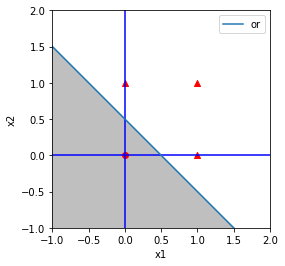

In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-2, 3, 0.5)
x2 = -x1 + 0.5

plt.axvline(x=0, color='b')  # draw x =0 axes
plt.axhline(y=0, color='b')  # draw y =0 axes
plt.axis([-1, 2, -1, 2])
plt.gca().set_aspect(aspect='equal', adjustable='box')

# 그래프 그리기
plt.plot(x1, x2, label="or")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.fill_between(x1, x2, -3, color='grey', alpha='0.5')

plt.scatter([0], [0], marker='o', color='r')
plt.scatter([1, 0, 1], [0, 1, 1], marker='^', color='r')

*퍼셉트론의 시각화: 회색 영역은 0을 출력하는 영역이며, 전체 영역은 OR 게이트의 성질을 만족*

* OR 게이트
  * ($x_1$, $x_2$) = (0, 0)일 때 0 출력
  * ($x_1$, $x_2$) = (0, 1), (1, 0), (1, 1)일 때 1 출력

* OR 게이트를 만들려면 그림의 $\bigcirc$와 $\triangle$를 직선으로 나눠야함
  * 위 그림에서의 직선은 해당 조건을 만족
  * 즉, 퍼셉트론으로 OR 게이트를 표현 가능

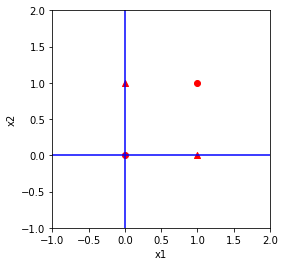

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-2, 3, 0.5)
x2 = -x1 + 0.5

plt.axvline(x=0, color='b')  # draw x =0 axes
plt.axhline(y=0, color='b')  # draw y =0 axes
plt.axis([-1, 2, -1, 2])
plt.gca().set_aspect(aspect='equal', adjustable='box')

# 그래프 그리기
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter([0, 1], [0, 1], marker='o', color='r')
plt.scatter([1, 0], [0, 1], marker='^', color='r')

*$\bigcirc$와 $\triangle$는 XOR 게이트의 출력을 나타낸다.*

* 위 그림에서 직선 하나로 $\bigcirc$와 $\triangle$를 직선으로 나눌 수 있는가? No!
  * 즉, 퍼셉트론으로 XOR를 표현할 수 없음.

### 2.4.2 선형과 비선형

* 직선으로 나누지 못한다면 곡선으로?
* (참고) 타원의 방정식:

$$
0 = a x^2 + b x y + c y^2 + d x + e y + f
$$

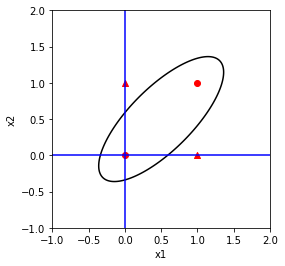

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.axvline(x=0, color='b')  # draw x =0 axes
plt.axhline(y=0, color='b')  # draw y =0 axes
plt.axis([-1, 2, -1, 2])
plt.gca().set_aspect(aspect='equal', adjustable='box')

# 그래프 그리기
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter([0, 1], [0, 1], marker='o', color='r')
plt.scatter([1, 0], [0, 1], marker='^', color='r')

x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
x, y = np.meshgrid(x, y)

a, b, c, d, e, f = 10, -15, 10, -2.5, -2.5, -2
assert b**2 - 4 * a * c < 0
plt.contour(
    x,
    y, (a * x**2 + b * x * y + c * y**2 + d * x + e * y + f), [0],
    colors='k')
plt.show()

* 퍼셉트론은 **직선 하나**로 나눈 영역만 표현할 수 있는 한계가 있음.
  * 위와 같은 곡선은 표현 불가
* **선현**과 **비선형**:
  * 비선형 영역: 곡선의 영역
  * 선형 영역: 직선의 영영

## 2.5 다층 퍼셉트론이 출동한다면

* 퍼셉트론으로는 XOR 게이트 표현 불가능
* **다층 퍼셉트론**(multi-layer perceptron): 여러 퍼셉트론으로 '층을 쌓아' 만들어진 퍼셉트론

### 2.5.1 기존 게이트 조합하기

* 앞서 만든 AND, NAND, OR 게이트를 조합하여 XOR 게이트를 만들 수 있음.

![](figures/fig 2-9.png)
*그림 2-9 AND, NAND, OR 게이트 기호*

* XOR 게이트 구현:

![](figures/fig 2-11.png)
*그림 2-11 AND, NAND, OR 게이트를 조합해 구현한 XOR 게이트*

* XOR 게이트:
  * $x_1$과 $x_2$가 입력 신호, y가 출력 신호
  * $x_1$과 $x_2$는 NAND와 OR 게이트의 입력이 되고, NAND와 OR의 출력이 AND 게이트의 입력으로 이어짐.

| $x_1$ | $x_2$ | $s_1$(NAND) | $s_2$(OR) | $y$(AND) |
|:-----:|:-----:|:-----------:|:---------:|:--------:|
|   0   |   0   |      1      |     0     |     0    |
|   1   |   0   |      1      |     1     |     1    |
|   0   |   1   |      1      |     1     |     1    |
|   1   |   1   |      0      |     1     |     0    |
*그림 2-12 XOR 게이트의 진리표*

### 2.5.2 XOR 게이트 구현하기

In [17]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [18]:
%%run_pytest[clean] -qq


@pytest.mark.parametrize('input1,input2,expected', [(0, 0, 0), (1, 0, 1),
                                                    (0, 1, 1), (1, 1, 0)])
def test_xor(input1, input2, expected):
    assert XOR(input1, input2) == expected

....


![](figures/fig 2-13.png)
*그림 2-13 XOR의 퍼셉트론*

* 다층 퍼셉트론(다층 구조 네트워크)
  * 층이 여러개인 퍼셉트론
  * 이 책에서는 왼쪽부터 차례로 0층, 1층, 2층으로 명명
  * AND, OR는 단층 퍼셉트론이며, XOR는 2층 퍼셉트론


<div class='alert alert-warning'>
[그림 2-13]의 퍼셉트론은 모두 2층으로 구성되지만, 가중치를 갖는 층은 2개(0층과 1층 사이, 1층과 2층 사이)뿐이라 '2층 퍼셉트론'이라 부름.
문헌에 따라서는 구성 층의 수를 기준으로 '3층 퍼셉트론'이라 하는 경우도 있음.
</div>

* 2층 퍼셉트론의 동작:
  1. 0층의 두 뉴런이 입력 신호를 받아 1층의 뉴런으로 신호를 보냄.
  2. 1층의 뉴련이 2층의 뉴런으로 신호를 보내고, 2층의 뉴런은 y를 출력함.
 

## 2.6 NAND에서 컴퓨터까지

* 다층 퍼셉트론은 지금까지 보아온 회로보다 복잡한 회로를 만들 수 있음.
* 이론상 NAND 게이트의 조합만으로 컴퓨터를 만들 수 있음.

## 2.7 정리

**이번 장에서 배운 내용**

* 퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력을 주면 정해진 규칙에 따른 값을 출력한다.
* 퍼셉트론에서는 '가중치'와 '편향'을 매개변수로 설정한다.
* 퍼셉트론으로 AND, OR 게이트 등의 논리 회로를 표현할 수 있다.
* XOR 게이트는 단층 퍼셉트론으로는 표현할 수 없다.
* 2층 퍼셉트론을 이용하면 XOR 게이트를 표현할 수 있다.
* 단층 퍼셉트론은 직선형 영역만 표현할 수 있고, 다층 퍼셉트론은 비선형 영역도 표현할 수 있다.
* 다층 퍼셉트론은 (이론상) 컴퓨터를 표현할 수 있다.